### Preparing

In [ ]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/sepsis/SEPSIS_8.csv")
df=data

In [ ]:
df

,AGE,SEX,height,weight,MBP,mcg/kg/min,PaO2/FIO2,MV,GCS,Urine output,Plt,Bil,LACTATE,Cr,SOFA,DEATH
0,61,1,162.0,78.00,45,0.103,196,0,14,1230,42,0.86,4.1,0.56,10,0
1,82,1,153.0,47.30,52,0.085,462,0,13,112,80,0.57,2.8,5.87,10,0
2,65,1,160.0,40.00,42,0.125,302,1,12,800,95,0.62,0.7,0.11,9,0
3,24,1,160.0,61.00,54,0.000,260,1,7,2535,206,0.52,2.3,0.51,7,0
4,72,1,148.0,32.00,56,0.156,297,1,7,335,216,0.41,5.0,0.34,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,83,0,160.0,85.00,65,0.000,350,1,5,1630,233,0.58,1.6,0.61,7,1
746,79,0,174.0,68.00,61,0.000,163,0,15,1623,108,0.61,2.0,1.06,4,0
747,65,0,165.0,53.00,67,0.132,238,1,6,2090,164,0.77,2.4,1.77,11,1
748,62,0,169.0,78.70,68,0.125,338,0,15,3710,19,1.22,2.5,2.43,12,0


In [ ]:
df.describe()

In [ ]:
df.isna().sum()

In [ ]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [ ]:
X

In [ ]:
y.unique()

array([0, 1])

### Model Pipeline Construction

#### train, validation, and test set split

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
xgb.set_config(verbosity=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=88, train_size=0.8)
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=88, test_size=0.8)

In [ ]:
# scaling X data

X_train_scaled = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
# X_val_scaled = (X_val - X_val.mean(axis=0)) / X_val.std(axis=0)
X_test_scaled= (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)

In [ ]:
y

0      0
1      0
2      0
3      0
4      1
      ..
745    1
746    0
747    1
748    0
749    1
Name: DEATH, Length: 750, dtype: int64

#### Models

##### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def cross_val(classifier, num_splits=10):
  model=classifier
  scores=cross_val_score(model, X, y, cv=num_splits)
  print('정확도: ',np.round(scores,2))
  print('평균 정확도: %0.2f' % (scores.mean()))

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
import numpy as np
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("RMSE: %0.2f" %(rmse))

RMSE: 0.42


##### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("RMSE: %0.2f" %(rmse))

RMSE: 0.51


##### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

##### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

##### SVC

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)

# scores=SVC.score(X_test_scaled, y_test)
scores = SVC.score(X_test_scaled, y_pred)
print("정확도: ",np.round(scores,2))

##### XGBOOST

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

xgb=XGBClassifier()
xgb.fit(X_train, y_train)
y_pred= xgb.predict(X_test)

scores=xgb.score(X_test, y_test)
print("정확도: ",np.round(scores,2))

정확도:  0.76


##### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

##### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

mlp=MLPClassifier(hidden_layer_sizes=(100,100,),random_state=42, max_iter=1000, learning_rate_init=0.0001, solver='lbfgs', alpha=0.000001, early_stopping=False, shuffle=True, warm_start=False)

mlp.fit(X_train,y_train)

train_set_score = mlp.score(X_train, y_train)
# val_set_score = mlp.score(X_val_scaled, y_val)
test_set_score=mlp.score(X_test, y_test)

print("Train set score: {:.3f}".format(train_set_score))
# print("Val set score: {:.3f}".format(val_set_score))
print("Test set score: {:.3f}".format(test_set_score))

Train set score: 0.873
Test set score: 0.700


#### Pipeline

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

model_pipleline = []
model_pipleline.append(LogisticRegression())
model_pipleline.append(KNeighborsClassifier())
model_pipleline.append(DecisionTreeClassifier())
model_pipleline.append(RandomForestClassifier())
# model_pipleline.append(SVC())
model_pipleline.append(XGBClassifier())
model_pipleline.append(MLPClassifier(hidden_layer_sizes=(100,100,),random_state=42, max_iter=1000, learning_rate_init=0.0001, solver='lbfgs', alpha=0.000001, early_stopping=False, shuffle=True, warm_start=False))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

model_pipleline = []
model_pipleline.append(LogisticRegression())
model_pipleline.append(KNeighborsClassifier())
model_pipleline.append(DecisionTreeClassifier())
model_pipleline.append(RandomForestClassifier())
model_pipleline.append(XGBClassifier())
model_pipleline.append(MLPClassifier())


In [ ]:
model_list=['LogisticRegression', 'KNN', 'Decision Tree','Random Forest', 'XGBClassifier',"MLP"]
acc_list = []
auc_list = []
cm_list = []
f1_list=[]
prec_list=[]
recall_list=[]

for model in model_pipleline:
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  acc_list.append(metrics.accuracy_score(y_test, y_pred))
  fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
  auc_list.append(round(metrics.auc(fpr, tpr),2))
  cm_list.append(confusion_matrix(y_test, y_pred))
  f1_list.append(f1_score(y_test,y_pred))
  prec_list.append(precision_score(y_test,y_pred))
  recall_list.append(recall_score(y_test,y_pred))


,Model,Accuracy_score
5,MLP,0.753333
3,XGBoost,0.740000
0,Logistic Regression,0.733333
6,SVC,0.720000
4,KNeighbours,0.686667
1,Decision Tree,0.673333
2,Random Forest,0.586667


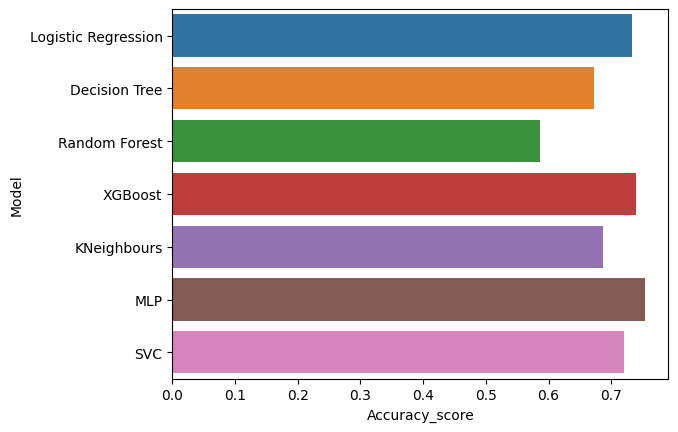

In [ ]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'MLP'],
    'Accuracy_score' :acc_list
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

In [ ]:

result_df = pd.DataFrame({'Model':model_list, 'Accruacy':np.round(acc_list,2), 'AUC':auc_list,
                           'F-1 Score':np.round(f1_list,2), 'Precision':np.round(prec_list,2), "Recall":np.round(recall_list,2)
                          })
result_df

,Model,Accruacy,AUC,F-1 Score,Precision,Recall
0,LogisticRegression,0.73,0.64,0.49,0.61,0.40
1,KNN,0.67,0.58,0.38,0.47,0.32
2,Decision Tree,0.59,0.53,0.37,0.35,0.38
3,Random Forest,0.74,0.64,0.47,0.65,0.36
4,XGBClassifier,0.69,0.50,0.00,0.00,0.00
5,MLP,0.75,0.70,0.59,0.61,0.57
6,SVC,0.72,0.63,0.48,0.58,0.40


#### MULTI LAYER PERCEPTRON

##### model composition

In [ ]:
# scaling X data

X_train_scaled = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
# X_val_scaled = (X_val - X_val.mean(axis=0)) / X_val.std(axis=0)
X_test_scaled= (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)

##### model training

In [ ]:
# from sklearn.neural_network import MLPClassifier

# # X_train_scaled = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
# # X_test_scaled= (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)

# # model=MLPClassifier(random_state=2)
# mlp=MLPClassifier(hidden_layer_sizes=(16,8), activation='relu', solver='adam',random_state=2)
# mlp.fit(X_train,y_train)
# y_pred = mlp.predict(X_test)

# print("Train set score: {:.3f}".format(mlp.score(X_train, y_train)))
# print("Test set score: {:.3f}".format(mlp.score(X_test, y_test)))
# #print(mlp.score(y_test, y_pred))
# score = roc_auc_score(y_test, y_pred)

In [ ]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

# mlp=MLPClassifier(hidden_layer_sizes=(10,),random_state=2,max_iter=1000,learning_rate_init=0.005, activation='relu',solver='sgd')
mlp=MLPClassifier(hidden_layer_sizes=(10,),random_state=2,max_iter=1000,learning_rate_init=0.0008, activation='relu',solver='sgd',alpha=0.0001)
# mlp=MLPRegressor(hidden_layer_sizes=(100,),random_state=2,max_iter=1000,learning_rate_init=0.0008, activation='relu',solver='sgd')
mlp.fit(X_train_scaled,y_train)

train_set_score = mlp.score(X_train_scaled, y_train)
# val_set_score = mlp.score(X_val_scaled, y_val)
test_set_score=mlp.score(X_test_scaled, y_test)

print("Train set score: {:.3f}".format(train_set_score))
# print("Val set score: {:.3f}".format(val_set_score))
print("Test set score: {:.3f}".format(test_set_score))

Train set score: 0.757
Test set score: 0.713


### 평가지표

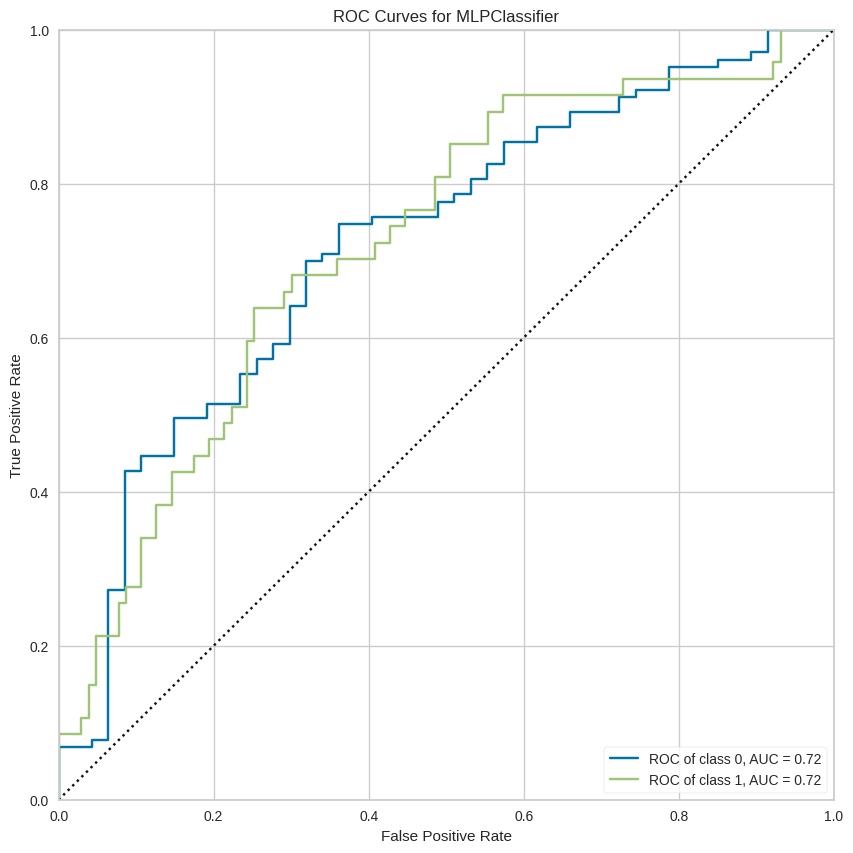

<Axes: title={'center': 'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from yellowbrick.classifier import ROCAUC
fig,ax= plt.subplots(figsize=(10,10))
roc_viz= ROCAUC(mlp,micro=False,macro=False, classes=["0", "1"])
roc_viz.fit(X_train,y_train)
roc_viz.score(X_test, y_test)
roc_viz.show()

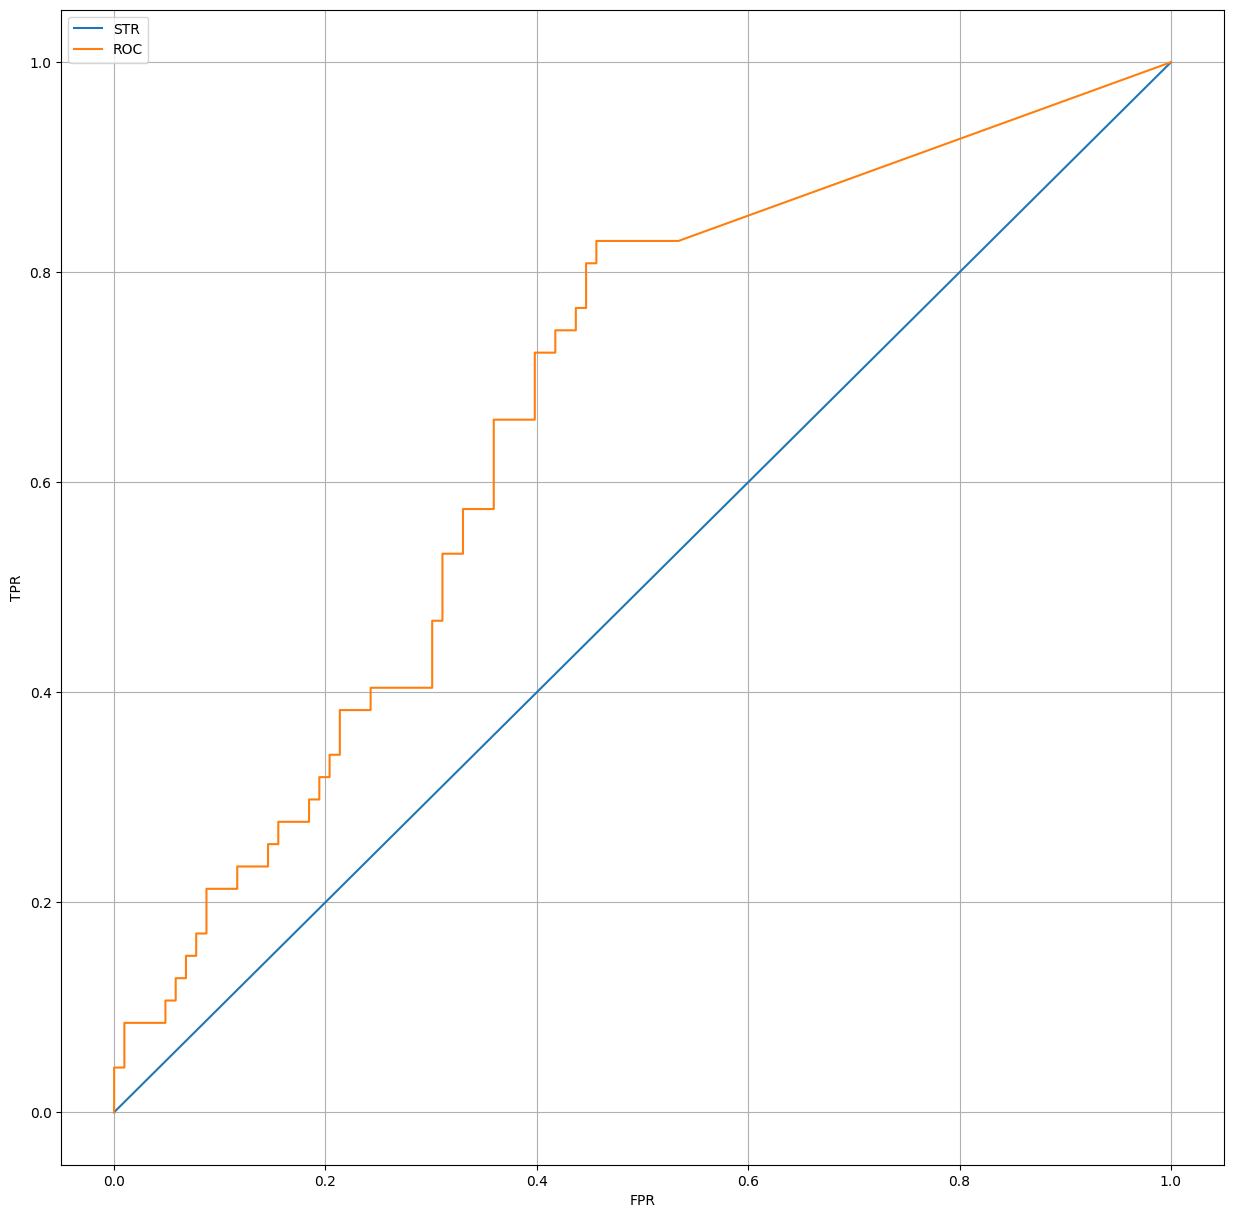

In [ ]:
pred_positive_label = mlp.predict_proba(X_test)[:,1]
# pred_positive_label = model.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, pred_positive_label)
precisions, recalls, thresholds = roc_curve(y_test, pred_positive_label)
plt.figure(figsize=(15,15))
# 대각선
plt.plot([0,1],[0,1],label='STR')
# ROC
plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()